<a href="https://colab.research.google.com/github/Rajath-55/Jupyter-Notebooks/blob/master/Spotify_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import requests
import json
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"


In [3]:
%cd /content/gdrive/My Drive/Kaggle


/content/gdrive/My Drive/Kaggle


In [4]:
%pwd

'/content/gdrive/My Drive/Kaggle'

In [5]:
!kaggle datasets download -d yamaerenay/spotify-dataset-19212020-160k-tracks

 95% 185M/195M [00:02<00:00, 104MB/s] 
100% 195M/195M [00:02<00:00, 94.3MB/s]


In [6]:
%ls
!unzip \*.zip  && rm *.zip

artists.csv           kaggle.json
CA_category_id.json   KR_category_id.json
CAvideos.csv          KRvideos.csv
data_by_artist_o.csv  matches.csv
data_by_genres_o.csv  most_runs_average_strikerate.csv
data_by_year_o.csv    MX_category_id.json
data_o.csv            MXvideos.csv
DE_category_id.json   Players.xlsx
deliveries.csv        RU_category_id.json
DEvideos.csv          RUvideos.csv
dict_artists.json     spotify-dataset-19212020-160k-tracks.zip
FR_category_id.json   spotifykmeans.png
FRvideos.csv          teams.csv
GB_category_id.json   teamwise_home_and_away.csv
GBvideos.csv          tracks.csv
IN_category_id.json   US_category_id.json
INvideos.csv          USvideos.csv
JP_category_id.json   website_classification.csv
JPvideos.csv
Archive:  spotify-dataset-19212020-160k-tracks.zip
replace artists.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: artists.csv             
  inflating: data_by_artist_o.csv    
  inflating: data_by_genres_o.csv    
  inflating: data_by_year_o.c

In [53]:
df = pd.read_csv('tracks.csv')


,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
397230,2GkCxLKP04KfDpUYLTmTNl,Lovers in Japan,40,411013,0,['Coldplay'],['4gzpq5DPGxSnKTe4SA8HAU'],2008-06-19,0.202,0.733,7,-7.599,1,0.0446,0.0427,0.696000,0.2430,0.0728,118.217,4
307775,2oUIldv6V9EFtlZ8QGsDWu,Life Can Be so Nice,32,193733,0,['Prince'],['5a2EaR3hamoenG9rDuVn8j'],1986-03-31,0.511,0.808,1,-12.863,1,0.0593,0.0156,0.000005,0.2290,0.5660,117.361,4
136992,49k9SgwjrZvxw6vta4b8qC,Le feutre taupé,12,162827,0,['Charles Aznavour'],['2hgP9Ap2tc10R5jrQaEpMT'],1956,0.592,0.237,8,-14.182,1,0.4070,0.8800,0.000000,0.0951,0.6610,91.026,4
41721,23sTGlQIsLtAxKuJj9Ekrd,Like It Is - Remastered,47,452533,0,['Yusef Lateef'],['33XkS6h90eeK7e6OJHw0mq'],1968,0.314,0.117,10,-19.235,0,0.0330,0.8290,0.883000,0.1060,0.2170,93.978,1
71930,2LFcCZZTc6SOo70bkYBjOZ,Mania De Voce - Ao Vivo,54,373667,0,"['Rita Lee', 'Milton Nascimento']","['7dnT2FUXhjirperXaH22IJ', '3Bnq7jiU506HcPjRgQ...",1998-01-01,0.437,0.501,2,-9.172,0,0.0434,0.8970,0.000353,0.7120,0.2950,105.279,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186236,1cPTxGFpPC8v4TzDIJey89,Better Than,31,209333,0,['John Butler Trio'],['6fBF4MULW5yMzyGaon1kUt'],2007-01-01,0.623,0.796,7,-5.654,1,0.0251,0.0273,0.000044,0.1600,0.7460,108.163,4
158980,7c7uAd3Cbj8FpzYUDGNh8w,Uni,52,149321,0,['Sech'],['77ziqFxp5gaInVrF2lj4ht'],2020-05-21,0.626,0.594,2,-5.139,1,0.4670,0.2520,0.000000,0.0899,0.4800,183.889,4
582275,3v5vOG27XDOWGD1uUk7M9q,Krafter,31,203680,0,['Gladys Del Pilar'],['6mDN09GRsio5HIoz7dCSJA'],2003-01-01,0.516,0.790,2,-5.906,1,0.0609,0.2740,0.000000,0.2010,0.6710,172.075,4
570052,7n8SA90dRjHyGklPL5N1CZ,Przejmujemy Jutuby,55,270000,1,"['WIP Bros', 'Ekipa']","['2W4S38H7nVYzH3O3m8CqM4', '4rneSQYWhgIT9pMX2N...",2020-02-12,0.785,0.826,8,-4.712,0,0.3170,0.0993,0.000000,0.1170,0.5300,97.975,4


In [9]:
import seaborn as sns
sns.set()


In [10]:
cols = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']

In [11]:
X = df[cols]
X

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence
0,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.744000,0.1510,0.1270
1,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.000000,0.1480,0.6550
2,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.021800,0.2120,0.4570
3,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.918000,0.1040,0.3970
4,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.130000,0.3110,0.1960
...,...,...,...,...,...,...,...,...,...,...
586667,0.560,0.5180,0,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110
586668,0.765,0.6630,0,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860
586669,0.535,0.3140,7,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663
586670,0.696,0.6150,10,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380


In [12]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [13]:
km = KMeans(
    n_clusters=25, init='k-means++',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=1
)
x = X.copy()

x['Cluster'] = km.fit_predict(X)

In [37]:
recommender = x.copy()
recommender['name'] = df['name']

In [15]:
# Clustering based on danceability:

danceable_cluster = x.sample(100)[['danceability', 'Cluster']]
danceable_cluster = danceable_cluster.reset_index()

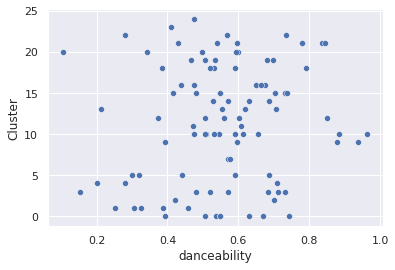

In [16]:
sns.scatterplot(data = danceable_cluster, x = 'danceability', y = 'Cluster')

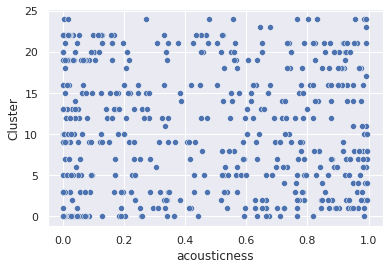

In [17]:
# Clustering based on acousticness:

accoustic_cluster = x.sample(500)[['acousticness', 'Cluster']]
accoustic_cluster = accoustic_cluster.reset_index()
sns.scatterplot(data = accoustic_cluster, x = 'acousticness', y = 'Cluster')

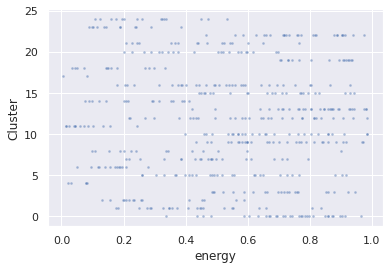

In [18]:
# Clustering based on energy:

energy_cluster = x.sample(500)[['energy', 'Cluster']]
energy_cluster = energy_cluster.reset_index()
sns.scatterplot(data = energy_cluster, x = 'energy', y = 'Cluster',palette=['red', 'blue', 'purple', 'green'], alpha=0.5, s=7)

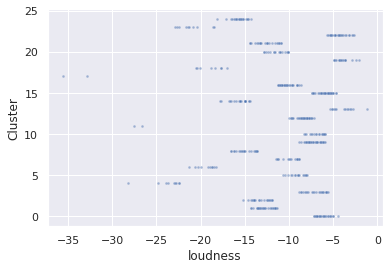

In [19]:
# Clustering based on loudness:

loudness_cluster = x.sample(500)[['loudness', 'Cluster']]
loudness_cluster = loudness_cluster.reset_index()
loudness_cluster
sns.scatterplot(data = loudness_cluster, x = 'loudness', y = 'Cluster', palette=['red', 'blue', 'purple', 'green'], alpha=0.5, s=7)

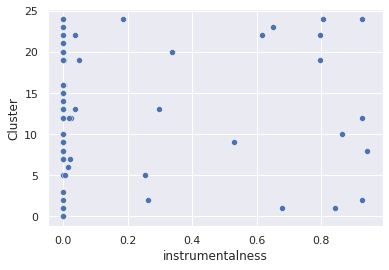

In [20]:
# Clustering based on instrumentalness:

instrumentalness_cluster = x.sample(100)[['instrumentalness', 'Cluster']]
instrumentalness_cluster = instrumentalness_cluster.reset_index()
sns.scatterplot(data = instrumentalness_cluster, x = 'instrumentalness', y = 'Cluster')

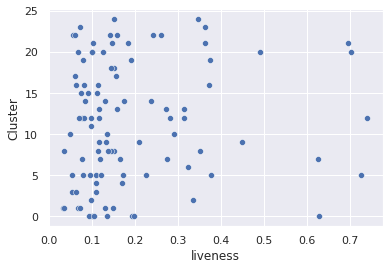

In [21]:
# Clustering based on liveness:

liveness_cluster = x.sample(100)[['liveness', 'Cluster']]
liveness_cluster = liveness_cluster.reset_index()
sns.scatterplot(data = liveness_cluster, x = 'liveness', y = 'Cluster')

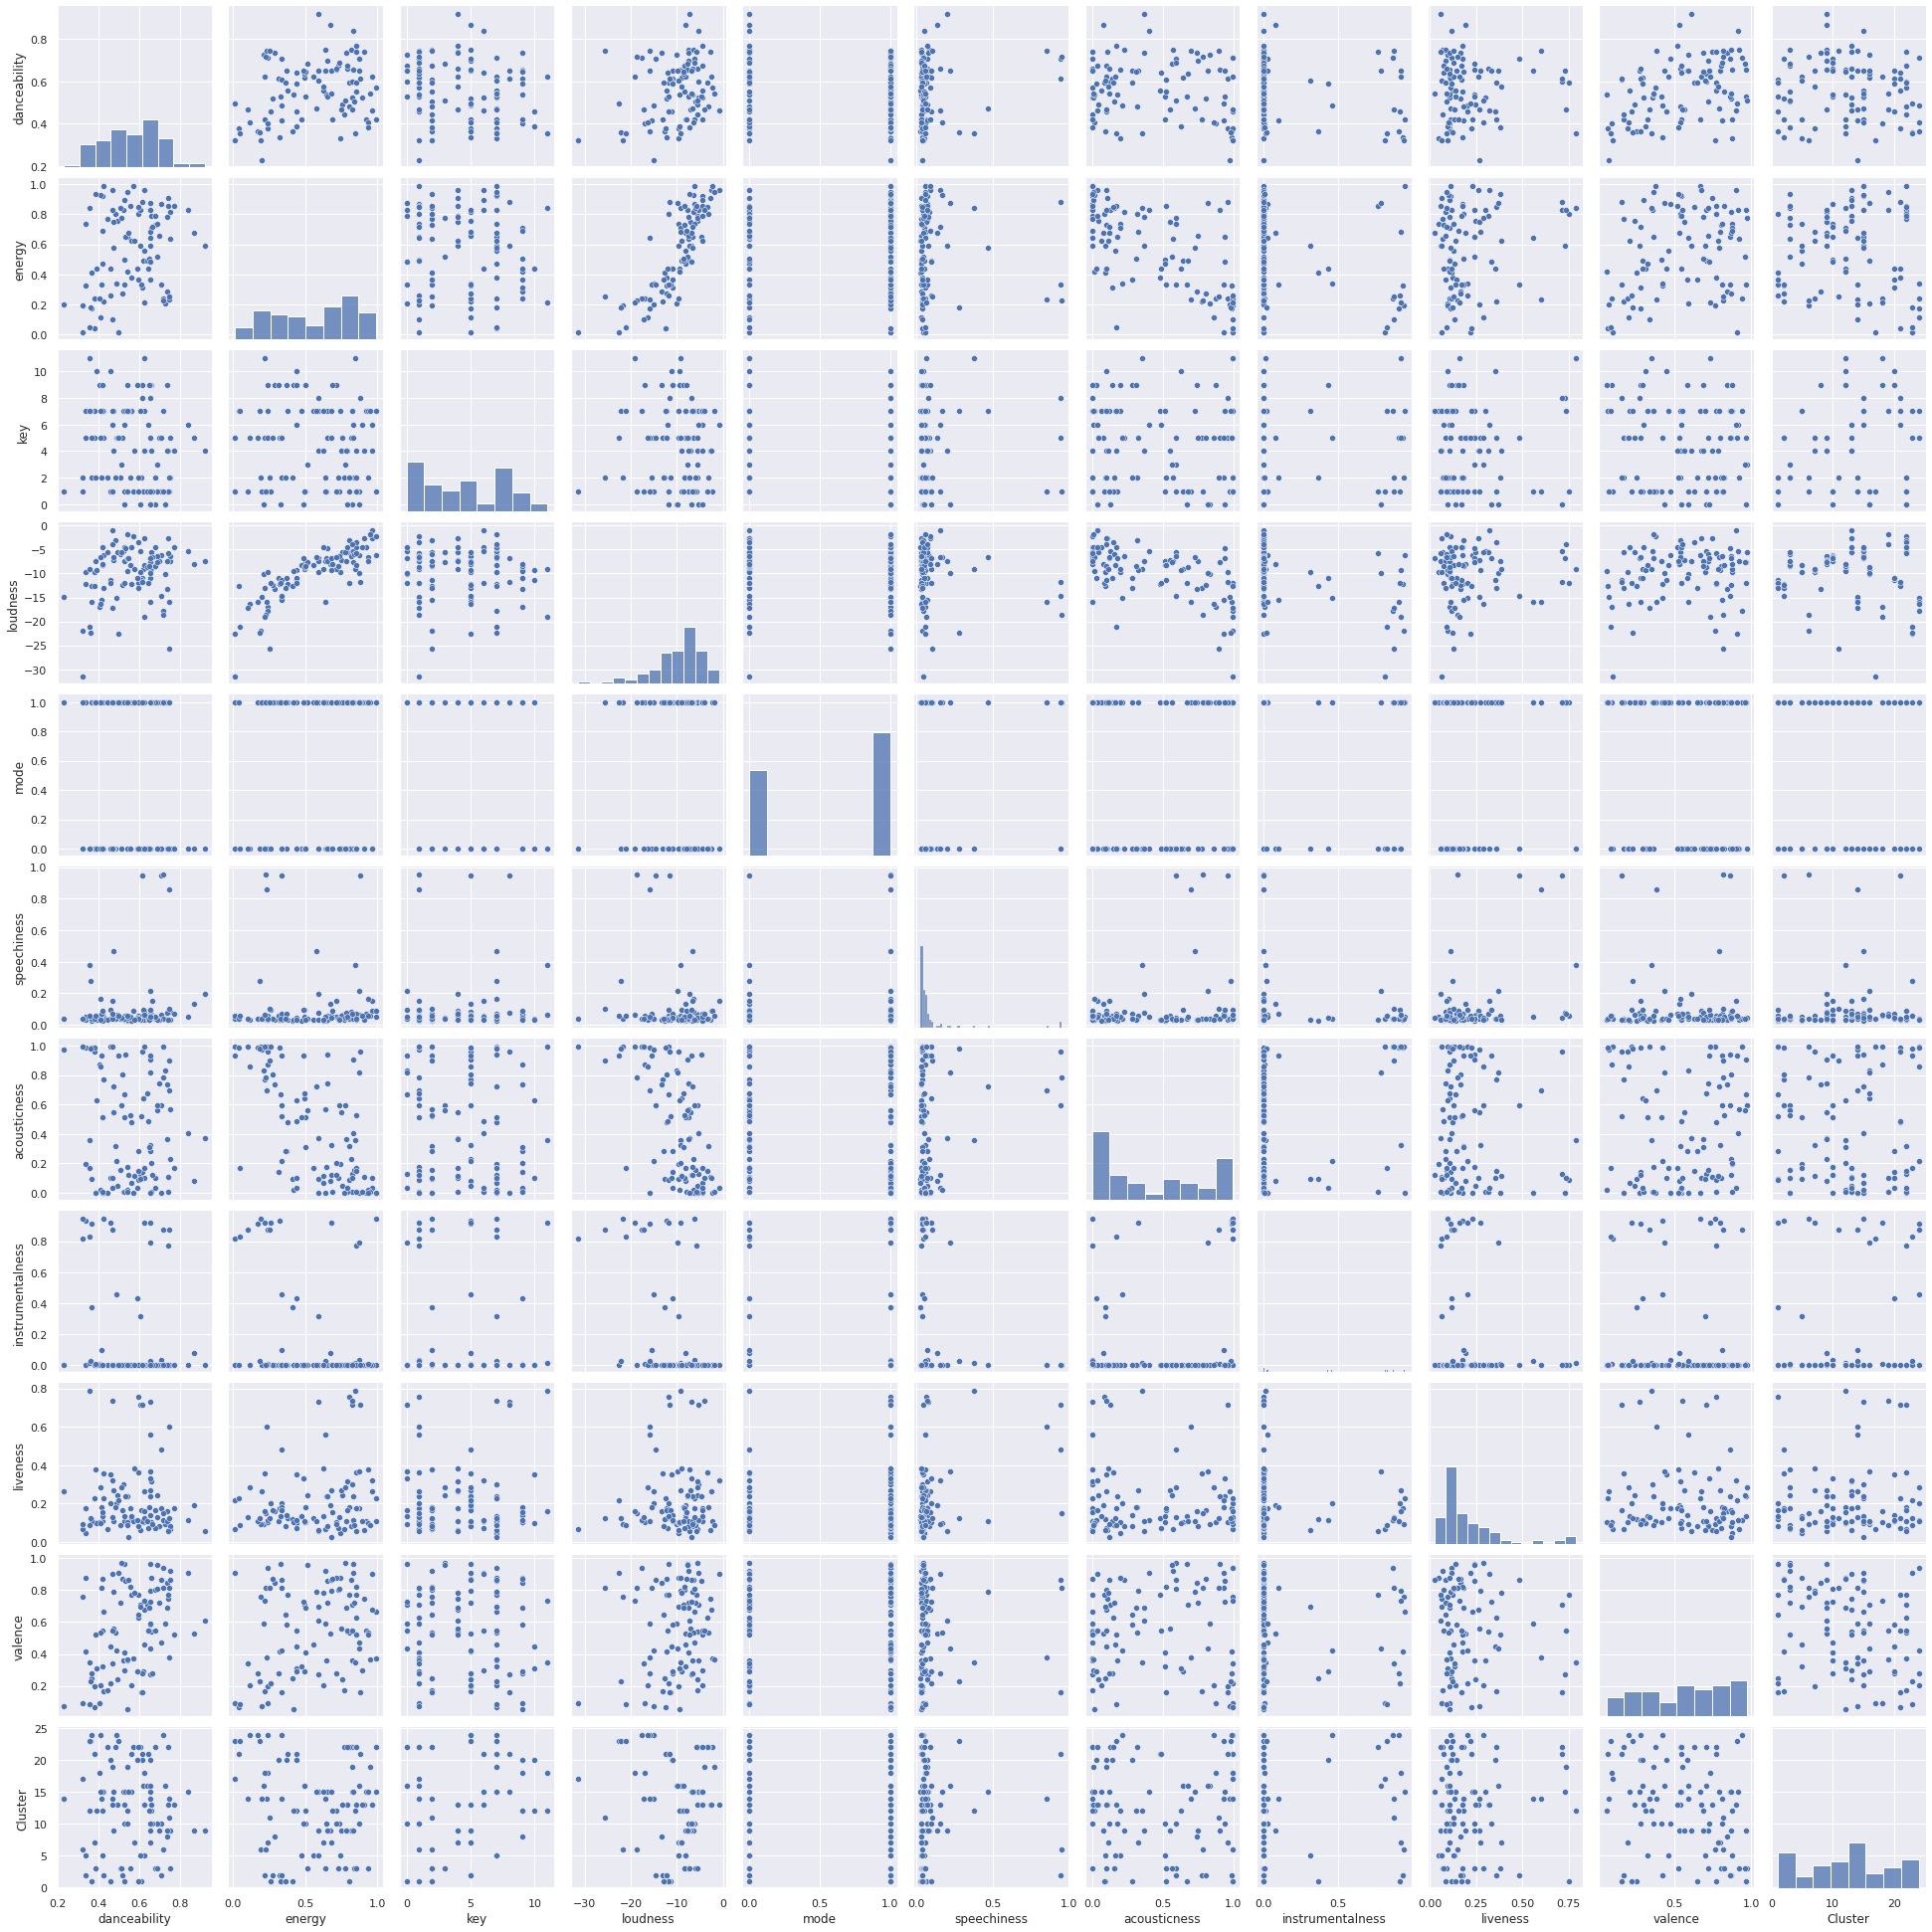

In [22]:
import matplotlib.pyplot as plt
sns.pairplot(x.sample(100))
plt.savefig('/content/gdrive/My Drive/Kaggle/spotifykmeans.png')



In [23]:
%cd /content/gdrive/My Drive/Kaggle

genres = pd.read_csv('data_by_genres_o.csv')

/content/gdrive/My Drive/Kaggle


In [24]:
genres

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,1,8-bit,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
3,1,[],0.651417,0.529093,2.328809e+05,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882,7
4,1,a cappella,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2968,1,zolo,0.222625,0.547082,2.580991e+05,0.610240,0.143872,0.204206,-11.295878,0.061088,125.494919,0.596155,33.778943,9
2969,0,zouglou,0.161000,0.863000,2.063200e+05,0.909000,0.000000,0.108000,-5.985000,0.081300,119.038000,0.845000,58.000000,7
2970,1,zouk,0.263261,0.748889,3.060728e+05,0.622444,0.257227,0.089678,-10.289222,0.038778,101.965222,0.824111,46.666667,5
2971,0,zurich indie,0.993000,0.705667,1.984173e+05,0.172667,0.468633,0.179667,-11.453333,0.348667,91.278000,0.739000,0.000000,7


In [25]:
top10_genres = genres.nlargest(10, 'popularity')

In [26]:
top10_genres

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
237,1,basshall,0.213167,0.81800,169799.166667,0.630167,0.000020,0.081067,-6.627833,0.134833,115.092500,0.588667,80.666667,2
2533,1,south african house,0.043833,0.84700,311854.333333,0.562333,0.130339,0.075133,-7.719000,0.050733,123.676333,0.834333,80.000000,1
2755,1,trap venezolano,0.044600,0.87700,231848.000000,0.777000,0.000035,0.086300,-4.246000,0.117000,102.020000,0.706000,80.000000,1
2778,0,turkish edm,0.008290,0.69800,186700.000000,0.719000,0.000004,0.326000,-4.923000,0.045500,120.062000,0.364000,80.000000,0
46,0,alberta hip hop,0.330000,0.88500,144000.000000,0.685000,0.000000,0.148000,-6.429000,0.062700,99.954000,0.937000,78.500000,11
536,0,chinese electropop,0.002570,0.66000,217088.000000,0.787000,0.000000,0.323000,-4.592000,0.032000,142.018000,0.199000,78.500000,1
37,0,afroswing,0.318450,0.71175,179995.375000,0.580187,0.000258,0.189950,-7.016687,0.195563,83.250125,0.676625,77.312500,11
31,0,afro soul,0.006270,0.76600,202627.000000,0.873000,0.000000,0.076400,-6.381000,0.143000,126.988000,0.743000,77.000000,11
575,1,circuit,0.009030,0.74500,189818.000000,0.972000,0.465000,0.297000,-3.506000,0.077400,128.031000,0.556000,77.000000,7
1239,1,guaracha,0.009030,0.74500,189818.000000,0.972000,0.465000,0.297000,-3.506000,0.077400,128.031000,0.556000,77.000000,7


In [27]:
cols = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']
genre_model=genres[cols]
km = KMeans(
    n_clusters=25, init='k-means++',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=1
)
g = genre_model.copy()

g['Cluster'] = km.fit_predict(genre_model)

In [28]:
g

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,Cluster
0,0.162883,0.071317,6,-31.514333,1,0.040567,0.979333,0.606834,0.361600,0.103783,17
1,0.299333,0.450678,5,-16.854000,1,0.076817,0.494780,0.477762,0.131000,0.221750,21
2,0.712000,0.818000,7,-9.180000,1,0.047000,0.762000,0.876000,0.126000,0.975000,15
3,0.529093,0.419146,7,-12.288965,1,0.107872,0.651417,0.205309,0.218696,0.513604,19
4,0.538961,0.316434,7,-12.479387,1,0.082851,0.676557,0.003003,0.172254,0.448249,19
...,...,...,...,...,...,...,...,...,...,...,...
2968,0.547082,0.610240,9,-11.295878,1,0.061088,0.222625,0.143872,0.204206,0.596155,10
2969,0.863000,0.909000,7,-5.985000,0,0.081300,0.161000,0.000000,0.108000,0.845000,8
2970,0.748889,0.622444,5,-10.289222,1,0.038778,0.263261,0.257227,0.089678,0.824111,14
2971,0.705667,0.172667,7,-11.453333,0,0.348667,0.993000,0.468633,0.179667,0.739000,19


In [29]:
g['Genre'] = genres['genres']

In [30]:
g

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,Cluster,Genre
0,0.162883,0.071317,6,-31.514333,1,0.040567,0.979333,0.606834,0.361600,0.103783,17,21st century classical
1,0.299333,0.450678,5,-16.854000,1,0.076817,0.494780,0.477762,0.131000,0.221750,21,432hz
2,0.712000,0.818000,7,-9.180000,1,0.047000,0.762000,0.876000,0.126000,0.975000,15,8-bit
3,0.529093,0.419146,7,-12.288965,1,0.107872,0.651417,0.205309,0.218696,0.513604,19,[]
4,0.538961,0.316434,7,-12.479387,1,0.082851,0.676557,0.003003,0.172254,0.448249,19,a cappella
...,...,...,...,...,...,...,...,...,...,...,...,...
2968,0.547082,0.610240,9,-11.295878,1,0.061088,0.222625,0.143872,0.204206,0.596155,10,zolo
2969,0.863000,0.909000,7,-5.985000,0,0.081300,0.161000,0.000000,0.108000,0.845000,8,zouglou
2970,0.748889,0.622444,5,-10.289222,1,0.038778,0.263261,0.257227,0.089678,0.824111,14,zouk
2971,0.705667,0.172667,7,-11.453333,0,0.348667,0.993000,0.468633,0.179667,0.739000,19,zurich indie


In [47]:
song_name = 'A Day At A Time'


In [32]:
!pip install fuzzywuzzy

In [33]:
from fuzzywuzzy import fuzz


/usr/local/lib/python3.7/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [74]:
close_list = []
clusters = []

name = recommender[recommender['name'] == song_name]
name.reset_index()

for i,j in name.iterrows():
  cluster = j['Cluster']

cluster

0

In [75]:
clusters = recommender[recommender['Cluster'] == cluster]

In [76]:
clusters

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,Cluster,Name,name
552,0.406,0.947,11,-4.784,1,0.2820,0.905000,0.002250,0.821,0.272,0,Ekipa Je Na Nogama,Ekipa Je Na Nogama
1811,0.519,0.484,10,-6.919,1,0.0438,0.992000,0.508000,0.117,0.602,0,Original Jelly Roll Blues,Original Jelly Roll Blues
2617,0.524,0.478,10,-6.882,1,0.0440,0.991000,0.669000,0.129,0.649,0,Original Jelly Roll Blues,Original Jelly Roll Blues
3048,0.634,0.811,11,-4.406,0,0.0287,0.086300,0.000032,0.133,0.660,0,Bottle of Wine,Bottle of Wine
3176,0.511,0.807,9,-6.349,1,0.0327,0.014100,0.025600,0.179,0.781,0,Take Me Down,Take Me Down
...,...,...,...,...,...,...,...,...,...,...,...,...,...
586605,0.465,0.506,10,-5.882,1,0.0474,0.629000,0.000000,0.103,0.329,0,说散就散 - 官方对唱版,说散就散 - 官方对唱版
586614,0.522,0.931,10,-5.449,0,0.2830,0.004170,0.007530,0.703,0.472,0,The Melody (FYHYM2019),The Melody (FYHYM2019)
586628,0.458,0.997,11,-5.406,1,0.1130,0.000776,0.872000,0.334,0.399,0,Sangre Caliente (FYHYM2019) - Scot Project Remix,Sangre Caliente (FYHYM2019) - Scot Project Remix
586654,0.317,0.545,11,-6.439,0,0.0469,0.039000,0.000000,0.116,0.140,0,Gone,Gone


In [80]:
clusters = clusters.sample(20)


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,Cluster,Name,name
119226,0.944,0.760,11,-4.355,0,0.0851,0.116000,0.000000,0.1130,0.545,0,Bring It Back,Bring It Back
263594,0.682,0.881,9,-5.781,0,0.1540,0.557000,0.000000,0.1130,0.545,0,Motajú Nám Hlavy,Motajú Nám Hlavy
303955,0.415,0.933,11,-4.737,0,0.0689,0.002210,0.057700,0.3580,0.171,0,Breathing Underwater,Breathing Underwater
506057,0.369,0.956,10,-6.318,1,0.0634,0.130000,0.001080,0.1630,0.253,0,Rocket Queen - 1986 Sound City Session,Rocket Queen - 1986 Sound City Session
510773,0.459,0.860,11,-5.965,0,0.0417,0.011800,0.000636,0.0808,0.264,0,Не йди,Не йди
436397,0.700,0.795,9,-6.260,0,0.0312,0.492000,0.000000,0.4270,0.639,0,Mil Anos - Live In Sao Paulo / 2010,Mil Anos - Live In Sao Paulo / 2010
178321,0.265,0.877,10,-6.873,0,0.0984,0.000404,0.418000,0.6730,0.234,0,Spiral Down,Spiral Down
173342,0.330,0.974,9,-5.011,0,0.0599,0.000001,0.429000,0.3090,0.377,0,Mirror of Madness,Mirror of Madness
223821,0.659,0.509,9,-7.031,0,0.0525,0.746000,0.000000,0.0485,0.925,0,נדודים,נדודים
118385,0.592,0.833,9,-6.796,0,0.0614,0.002290,0.110000,0.2090,0.193,0,I Will Follow You - Alexander Popov Remix,I Will Follow You - Alexander Popov Remix


In [83]:
print('Recommended Songs : ')
for i,j in clusters.sample(20).iterrows():
  print(j['Name'])


Recommended Songs : 
Ese Hombre Es Mio
Goldeneye - 2003 Remaster
Jackie Cane
Josslyn
A Woman In Love (It's Not Me)
บุษบา
Buscando un Ángel
Mo basta (Parte I) - Live; Remastered
Beltane - 2003 Remaster
Пивной череп
Bmbrjxxx (The King of Basia Remix)
Si Fuera Como Ayer
Nothing About Me
Anak Ayam (Freak To The Beat)
Jag går på promenaden
อย่าเล่นแบบนี้
Így váltam köddé
Ferma A Guardare
心癮
I Garsona
